<a href="https://colab.research.google.com/github/notacodingguy/TensorFlow-Examples/blob/master/gbmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X_all = np.random.randn(5000, 1)
y_all = (X_all[:, 0] > 0)*2 - 1

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.5, random_state=42)

In [3]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

print ('Accuracy for a single decision stump: {}'.format(clf.score(X_test, y_test)))

Accuracy for a single decision stump: 0.9996


In [4]:
# For convenience we will use sklearn's GBM, the situation will be similar with XGBoost and others
clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
print("Test logloss: {}".format(log_loss(y_test, y_pred)))

Test logloss: 0.0035498450944991297


In [5]:
def compute_loss(y_true, scores_pred):
    '''
        Since we use raw scores we will wrap log_loss 
        and apply sigmoid to our predictions before computing log_loss itself
    '''
    return log_loss(y_true, sigmoid(scores_pred))
    

'''
    Get cummulative sum of *decision function* for trees. i-th element is a sum of trees 0...i-1.
    We cannot use staged_predict_proba, since we want to maniputate raw scores
    (not probabilities). And only in the end convert the scores to probabilities using sigmoid
'''
cum_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0] 

print ("Logloss using all trees:           {}".format(compute_loss(y_test, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_test, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_test, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.0035498450944991297
Logloss using all trees but last:  0.0035498450944991297
Logloss using all trees but first: 0.0035297472306096487


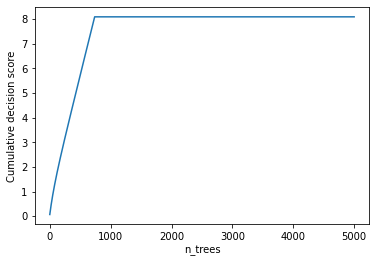

In [6]:
plt.plot(cum_preds[:, y_test == 1][:, 0])

plt.xlabel('n_trees')
plt.ylabel('Cumulative decision score');

In [7]:
clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=8, max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
print("Test logloss: {}".format(log_loss(y_test, y_pred)))

Test logloss: 0.008015169072268147


In [8]:
cum_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0] 
print ("Logloss using all trees:           {}".format(compute_loss(y_test, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_test, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_test, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.008015169072268147
Logloss using all trees but last:  0.004817395468639595
Logloss using all trees but first: 2.109528174463135
